# Main Objective:

**We'll use a dataset that contains various physical measurments related to human activity collectedusing their smartphones. While the dataset also contains a target column that tells us the current activity of the smartphone user, we will use use the remaining columns to train our data using clustering algorithms and see if our clusters accurately correspond to the various activities in the target column.** 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [3]:
filename = 'Lab_4/Human_Activity_recognition_Using_Smartphones_Data.csv'

In [4]:
data = pd.read_csv(filename)

In [5]:
data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING


In [149]:
#data.info(max_cols = 600)

In [7]:
data.shape

(10299, 562)

## Brief description of the dataset:

**This dataset has 561 features and one target column. Since there are too many target features for us to list down all of them, we'll just give a braod idea of these features. The features describe in detail the physical state of a human through data colleted via their smartphones. The data describes statistical properties such as mean, standard deviation, minimum, maximum etc. of various measurements like their acceleration along the three dimensions, the jerks assoicated with these accelerations, the gyroscopic angles as recorded by the smartphones etc. All the features are of float type. The target column is categorical and takes 6 different values. They are 'Standing', 'Sitting', 'Laying', 'Walking', 'Walking Downstairs' and 'Walking Upstairs'. There are 10299 observations in this dataset.**

In [8]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

**There are no empty cells in the dataset so we move on to looking at outliers.**

In [9]:
y = data.Activity
X = data.drop('Activity', axis = 1)

In [10]:
X.skew()

tBodyAcc-mean()-X                      -3.490402
tBodyAcc-mean()-Y                      -0.429086
tBodyAcc-mean()-Z                       1.759648
tBodyAcc-std()-X                        0.637015
tBodyAcc-std()-Y                        0.435296
                                          ...   
angle(tBodyGyroMean,gravityMean)       -0.034161
angle(tBodyGyroJerkMean,gravityMean)    0.017421
angle(X,gravityMean)                    1.423169
angle(Y,gravityMean)                   -1.425668
angle(Z,gravityMean)                   -0.907224
Length: 561, dtype: float64

<AxesSubplot:>

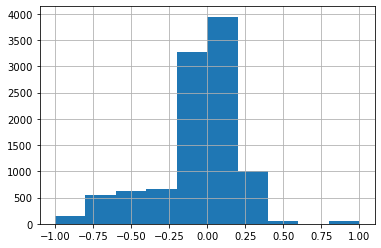

In [11]:
data['angle(Z,gravityMean)'].hist()

In [12]:
positively_skewed_cols = X.columns[X.skew() > 0.75].tolist()

**As we can see, a lot of columns have a high skew value. If we remove outliers using the inter-quartile range then we'll ed up removing a lot of rows from because in these distributions are very skewed.**

In [13]:
X[positively_skewed_cols].skew()

tBodyAcc-mean()-Z                  1.759648
tBodyAcc-max()-Z                   0.810513
tBodyAcc-energy()-X                1.735145
tBodyAcc-energy()-Y                1.919158
tBodyAcc-energy()-Z                2.223910
                                     ...   
fBodyBodyGyroJerkMag-energy()      4.677017
fBodyBodyGyroJerkMag-iqr()         1.491907
fBodyBodyGyroJerkMag-maxInds       5.286339
fBodyBodyGyroJerkMag-kurtosis()    1.531018
angle(X,gravityMean)               1.423169
Length: 304, dtype: float64

In [14]:
stats_data = X.describe()

In [15]:
stats_data.loc['IQ_range'] = stats_data.loc['75%'] - stats_data.loc['25%']

In [16]:
stats_data.loc['Min_Outliers'] = stats_data.loc['25%'] - 1.5*stats_data.loc['IQ_range']

In [17]:
stats_data.loc['Max_Outliers'] = stats_data.loc['75%'] + 1.5*stats_data.loc['IQ_range']

In [18]:
for col in data.columns[:-1]:
    X = X[(X[col] > stats_data[col]['Min_Outliers'])&(X[col] < stats_data[col]['Max_Outliers'])  ]

In [19]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
12,0.278457,-0.020415,-0.112732,-0.999135,-0.984680,-0.996274,-0.999077,-0.982937,-0.996410,-0.943906,...,0.689897,-0.686389,-0.878751,-0.077552,-0.101222,0.639084,0.765485,-0.850654,0.187611,-0.035998
17,0.280135,-0.013917,-0.106370,-0.997695,-0.987516,-0.990407,-0.998014,-0.987954,-0.992190,-0.942076,...,0.428614,-0.328899,-0.596860,-0.028332,0.092367,-0.822239,0.367557,-0.759363,0.264033,0.029664
21,0.277152,-0.017983,-0.106601,-0.997763,-0.989957,-0.996586,-0.998291,-0.989669,-0.996700,-0.941472,...,0.576339,-0.848198,-0.950247,-0.002320,0.150391,0.142331,-0.853711,-0.762023,0.262170,0.029987
35,0.270908,-0.014413,-0.106522,-0.993856,-0.993179,-0.993470,-0.993878,-0.992131,-0.992788,-0.941617,...,0.054595,-0.430744,-0.823181,0.064398,0.300924,0.117655,-0.046455,-0.316732,-0.217729,-0.323329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,0.282594,-0.018429,-0.114463,-0.996337,-0.987061,-0.979211,-0.996797,-0.985949,-0.980258,-0.936081,...,0.278282,-0.562381,-0.844397,-0.047403,0.065180,0.042250,-0.037745,-0.577496,-0.124486,-0.176635
10150,0.276631,-0.016829,-0.106878,-0.995295,-0.988179,-0.977193,-0.996198,-0.987511,-0.977204,-0.936081,...,0.253203,-0.570589,-0.754502,0.011320,0.224079,0.009832,-0.336514,-0.579085,-0.124292,-0.175200
10151,0.272996,-0.015188,-0.106139,-0.995700,-0.988208,-0.981363,-0.996234,-0.987784,-0.979568,-0.944670,...,0.529431,-0.691313,-0.885852,0.154593,-0.140512,-0.550471,0.004109,-0.578934,-0.124448,-0.175171
10165,0.279439,-0.015869,-0.152392,-0.993200,-0.972032,-0.970472,-0.993700,-0.970110,-0.968884,-0.936054,...,0.408190,-0.590484,-0.821132,0.007728,-0.117124,-0.221814,0.338622,-0.896422,0.026521,-0.006241


**Very few rows remain if we remove the outliers outside 1.5 times the inter-quartile range. This is because there are many columns and the outliers don't always overlap. To correct this, we will first use PCA to reduce the number of features and then we will remove the outliers from a smaller number of features.**

## PCA

re-intializing X because it was changed when we removed the outliers.

In [20]:
X = data.drop('Activity', axis = 1)

We scale the columns before using PCA

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [22]:
for column in X.columns:
    X[column] = minmax.fit_transform(X[[column]])

In [23]:
from sklearn.decomposition import PCA

In [24]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 100, 3):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.622271
4,PCA(n_components=4),0.728411
7,PCA(n_components=7),0.768409
10,PCA(n_components=10),0.79765
13,PCA(n_components=13),0.819298
16,PCA(n_components=16),0.835366
19,PCA(n_components=19),0.848893
22,PCA(n_components=22),0.861007
25,PCA(n_components=25),0.871637


In [37]:
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')
#sns.set_context('notebook')
sns.set_palette('dark')

[Text(0.5, 0, 'Number of Features'),
 Text(0, 0.5, 'Variance'),
 Text(0.5, 1.0, 'Variance vs Number of Features')]

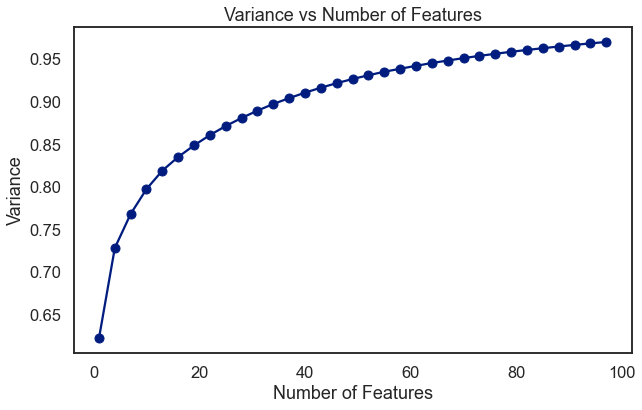

In [39]:
ax = pca_df['var'].plot(marker = 'o', figsize = (10,6))
ax.set(xlabel = 'Number of Features', ylabel = 'Variance', title ='Variance vs Number of Features')

In [42]:
PCA100 = PCA(n_components = 100)

In [43]:
X_trans = PCA100.fit_transform(X)

In [44]:
PCA100.explained_variance_ratio_.sum()

0.9719430651154952

**Only two columns have skew values greater than 0.75 now. We log transform them before removing the outliers.**

In [45]:
X_trans = pd.DataFrame(X_trans)

In [46]:
X_trans.columns[X_trans.skew() > 0.75].tolist()

[92]

In [47]:
X_trans.skew()[92]

1.0023910089997354

**The columns are normally distributed now as all of them have skew values under 0.75**

In [48]:
stats_data = X_trans.describe()

In [49]:
stats_data.loc['IQ_range'] = stats_data.loc['75%'] - stats_data.loc['25%']

In [50]:
stats_data.loc['Min_Outliers'] = stats_data.loc['25%'] - 1.5*stats_data.loc['IQ_range']

In [51]:
stats_data.loc['Max_Outliers'] = stats_data.loc['75%'] + 1.5*stats_data.loc['IQ_range']

In [52]:
for col in X_trans.columns[:]:
    X_trans_2 = X_trans[(X_trans[col] > stats_data[col]['Min_Outliers'])&(X_trans[col] < stats_data[col]['Max_Outliers'])  ]

In [53]:
X_trans_2.shape

(10099, 100)

In [54]:
X_trans_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,...,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000
mean,-0.046330,-0.010228,-0.000737,-0.005077,-0.001276,-0.001263,-0.002487,-0.001517,-0.000516,-0.002501,...,0.000148,0.000026,0.000123,-0.000392,-0.000197,-0.000182,0.000358,-0.000482,0.000402,0.001421
std,2.881914,0.799061,0.738886,0.487994,0.461472,0.401613,0.398557,0.379549,0.358920,0.344488,...,0.090316,0.089328,0.088242,0.086671,0.086127,0.084995,0.084058,0.084010,0.082588,0.074736
min,-3.336726,-2.765287,-1.525724,-1.451474,-1.979731,-1.375017,-1.208581,-1.264785,-1.169527,-1.215660,...,-0.378016,-0.415001,-0.384852,-0.373091,-0.524257,-0.500773,-0.417710,-0.407193,-0.372074,-0.202273
25%,-2.771553,-0.591716,-0.515533,-0.318542,-0.272958,-0.283070,-0.278406,-0.279014,-0.244953,-0.231937,...,-0.057007,-0.057012,-0.056153,-0.053770,-0.056138,-0.052873,-0.051707,-0.054756,-0.047703,-0.047821
50%,-1.653097,-0.011657,-0.099835,0.009217,0.008296,0.027488,-0.024771,-0.027737,-0.008007,-0.000266,...,-0.000351,-0.000388,-0.005334,0.000412,-0.002108,0.000252,-0.000200,-0.000635,-0.000590,0.002274
75%,2.714084,0.536075,0.377478,0.297879,0.267198,0.291436,0.248655,0.257983,0.234206,0.226354,...,0.058970,0.055585,0.046155,0.054527,0.053318,0.052064,0.051966,0.054353,0.045831,0.051979
max,8.526298,3.670300,3.237540,2.713835,2.589128,1.610597,1.714980,1.531012,1.365665,1.244752,...,0.661463,0.481498,0.562354,0.727674,0.556085,0.564522,0.578122,0.434987,0.481212,0.205375


The mean for all of the columns is approximately zero. So we move on without any further scaling.

**The original dataset has 10,299 rows and now the modified dataset has 10,099 rows after removing the outliers.**

**Now we start clustering our data and then we'll compare the clusters formed with the target column.**

In [58]:
y = y[X_trans_2.index.tolist()]

## K-Means

In [59]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Inertia vs Number of Clusters')

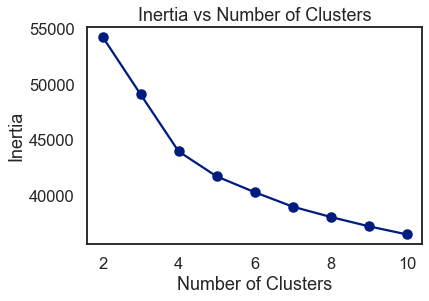

In [61]:
### BEGIN SOLUTION
inertia = []
list_num_clusters = list(range(2,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_trans_2)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)#Creates a line plot
plt.scatter(list_num_clusters,inertia)#Adds the points
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.title('Inertia vs Number of Clusters')
### END SOLUTION

In [63]:
km6 = KMeans(n_clusters=6)
km4 = KMeans(n_clusters = 4)

In [64]:
km6.fit(X_trans_2)
km4.fit(X_trans_2)

KMeans(n_clusters=4)

In [65]:
y_pred_km6 = km6.labels_
y_pred_km4 = km4.labels_

In [66]:
y.value_counts()

LAYING                1917
STANDING              1902
SITTING               1753
WALKING               1682
WALKING_UPSTAIRS      1512
WALKING_DOWNSTAIRS    1333
Name: Activity, dtype: int64

In [67]:
np.unique(y_pred_km6, return_counts = True)

(array([0, 1, 2, 3, 4, 5]),
 array([1867, 1801, 1325, 1849,  825, 2432], dtype=int64))

In [68]:
np.unique(y_pred_km4, return_counts = True)

(array([0, 1, 2, 3]), array([2746, 3584, 1812, 1957], dtype=int64))

**Let's look at how the predictions compare to the actual Acitivty values.**

In [69]:
y = pd.DataFrame(y)

In [70]:
y['Activity_pred_km6'] = y_pred_km6

In [73]:
y['Activity_pred_km4'] = y_pred_km4

In [74]:
y

,Activity,Activity_pred_km6,Activity_pred_km4
0,STANDING,5,1
1,STANDING,5,1
2,STANDING,5,1
3,STANDING,5,1
4,STANDING,5,1
...,...,...,...
10294,WALKING_UPSTAIRS,3,0
10295,WALKING_UPSTAIRS,3,0
10296,WALKING_UPSTAIRS,3,0
10297,WALKING_UPSTAIRS,3,0


In [75]:
(y[['Activity','Activity_pred_km6']]
 .groupby(['Activity','Activity_pred_km6'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           Activity_pred_km6        
LAYING             1                    1752
                   2                     154
                   3                      11
SITTING            1                      49
                   2                     479
                   3                       3
                   5                    1222
STANDING           2                     692
                   5                    1210
WALKING            0                     948
                   3                     547
                   4                     187
WALKING_DOWNSTAIRS 0                     620
                   3                     162
                   4                     551
WALKING_UPSTAIRS   0                     299
                   3                    1126
                   4                      87

0. Walking + Walking downstairs + Walking upstairs
1. Laying
2. Sitting + Standing
3. Walking + Walking downstairs + Walking upstairs
4. Walking + Walking downstairs + Walking upstairs
5. Sitting+ Standing

In [76]:
(y[['Activity','Activity_pred_km4']]
 .groupby(['Activity','Activity_pred_km4'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           Activity_pred_km4        
LAYING             0                      20
                   3                    1897
SITTING            0                       5
                   1                    1688
                   3                      60
STANDING           0                       6
                   1                    1896
WALKING            0                    1074
                   2                     608
WALKING_DOWNSTAIRS 0                     350
                   2                     983
WALKING_UPSTAIRS   0                    1291
                   2                     221

0. Walking + Walking upstairs + Walking Downstairs
1. Sitting + Standing
2. Walking downstairs + Walking + Walking Upstairs
3. Laying

## Hierarchical Agglomerative Clustering

In [142]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
ag_4 = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(X_trans_2)
ag_4 = ag_4.fit(X_trans_2)
y_pred_ag = ag.fit_predict(X_trans_2)
y_pred_ag4 = ag_4.fit_predict(X_trans_2)

In [143]:
np.unique(y_pred_ag, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([2894, 1634, 1599, 1867,  442, 1663], dtype=int64))

In [145]:
y['Activity_pred_ag'] = y_pred_ag
y['Activity_pred_ag_4'] = y_pred_ag4

In [80]:
(y[['Activity','Activity_pred_ag']]
 .groupby(['Activity','Activity_pred_ag'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           Activity_pred_ag        
LAYING             2                   1590
                   4                    327
SITTING            0                      1
                   2                      9
                   3                    857
                   4                     97
                   5                    789
STANDING           3                   1010
                   4                     18
                   5                    874
WALKING            0                   1390
                   1                    292
WALKING_DOWNSTAIRS 0                    108
                   1                   1225
WALKING_UPSTAIRS   0                   1395
                   1                    117

0. Walking_upstairs + Walking
1. Walking_downstairs + Walking
2. Laying
3. Standing + Sitting
4. Sitting + Standing
5. Walking_downstairs


In [147]:
(y[['Activity','Activity_pred_ag_4']]
 .groupby(['Activity','Activity_pred_ag_4'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           Activity_pred_ag_4        
LAYING             0                     1917
SITTING            0                      106
                   1                        1
                   2                     1646
STANDING           0                       18
                   2                     1884
WALKING            1                     1390
                   3                      292
WALKING_DOWNSTAIRS 1                      108
                   3                     1225
WALKING_UPSTAIRS   1                     1395
                   3                      117

In [81]:
ag = AgglomerativeClustering(n_clusters=12, linkage='ward', compute_full_tree=True)
ag_12 = ag.fit(X_trans_2)
y_pred_ag_12 = ag_12.fit_predict(X_trans_2)

In [590]:
y['Activity_pred_ag_12'] = y_pred_ag_12

In [591]:
y

,Activity,Activity_pred_km6,Activity_pred_ag,Activity_pred_ag_12
1,STANDING,3,5,5
2,STANDING,3,2,7
3,STANDING,3,5,5
4,STANDING,3,5,5
5,STANDING,3,5,5
...,...,...,...,...
10294,WALKING_UPSTAIRS,1,1,8
10295,WALKING_UPSTAIRS,1,1,8
10296,WALKING_UPSTAIRS,1,1,8
10297,WALKING_UPSTAIRS,1,1,8


In [592]:
(y[['Activity','Activity_pred_ag_12']]
 .groupby(['Activity','Activity_pred_ag_12'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           Activity_pred_ag_12        
LAYING             0                      1207
                   3                        41
                   6                       661
SITTING            0                         6
                   3                       320
                   5                       758
                   7                       668
STANDING           3                       368
                   5                       537
                   7                       991
WALKING            1                       122
                   2                       360
                   4                       116
                   8                       245
                   9                        23
                   10                      137
                   11                      659
WALKING_DOWNSTAIRS 2                       438
                   4                       513
                   8                       164
                   9                       157
                   10                       38
                   11                        1
WALKING_UPSTAIRS   1                       247
                   2                       339
                   4                        53
                   8                       864
                   11                        1

---

## DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
db6 = DBSCAN(eps = 0.459, min_samples = 2)
db6 = db6.fit(X_trans_2)

In [84]:
np.unique(db6.labels_, return_counts = True)

(array([-1], dtype=int64), array([10099], dtype=int64))

**The problem seems to be coming in from the fact that there are many dimensions as a result of which there are too many outiers**.

In [140]:
db6 = DBSCAN(eps = 2.75, min_samples = 2)
db6 = db6.fit(X_trans_2)

In [141]:
np.unique(db6.labels_, return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([    4, 10073,     2,     2,     2,    14,     2], dtype=int64))